# Description
### You are supposed to detect whether the person is running or walking based on the sensor data collected from an iOS device. The dataset contains a single file which represents sensor data samples collected from the accelerometer and gyroscope from iPhone 5c in 10 seconds interval and -5.4/second frequency.
#### There is an activity type represented by "activity" column which acts as label and reflects following activities:
### ● "0": walking
### ● "1": running
#### Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:
### ● "0": left wrist
### ● "1": right wrist
# Objective:
### Practice classification based on Naive Bayes algorithm. Identify the predictors that can be influential.
### Actions to Perform:
1. Load the kinematics dataset as measured on mobile sensors from the file "run or walk.csv."
2. List the columns in the dataset.
3. Perform EDA
4. Let the target variable "y" be the activity, and assign all the other columns to "x."
5. Apply all the classification models studied till now and compare the accuracy.
6. Generate a classification report of each algorithm.
7. Repeat the model once using only the acceleration values as predictors and then
using only the gyro values as predictors.
8. Comment on the difference in accuracy between both models.

In [3]:
import pandas as pd
import numpy as np

In [7]:
# import dataset

df = pd.read_csv('run_or_walk.csv')
df.shape

(88588, 11)

In [3]:
df.tail(100)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88488,2017-7-9,20:9:45:917378008,viktor,0,0,0.5083,-1.0681,-0.3270,1.6989,-1.6657,3.0520
88489,2017-7-9,20:9:46:117829978,viktor,0,0,0.3193,-0.9332,-0.1494,0.4897,2.7695,0.7814
88490,2017-7-9,20:9:46:516934990,viktor,0,0,0.5541,-1.1165,-0.3813,0.1408,-0.4957,0.3932
88491,2017-7-9,20:9:46:716329991,viktor,0,0,0.2829,-0.9505,0.0208,-1.9152,1.4472,-1.4414
88492,2017-7-9,20:9:46:917169988,viktor,0,0,0.4180,-1.0365,-0.0410,0.1157,0.8629,0.6208
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [4]:
df['date'].unique()

array(['2017-6-30', '2017-7-10', '2017-7-11', '2017-7-15', '2017-7-16',
       '2017-7-17', '2017-7-1', '2017-7-2', '2017-7-4', '2017-7-6',
       '2017-7-7', '2017-7-9'], dtype=object)

In [5]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

#### Observation- As per above output means there is no missing value

In [6]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [7]:
# drop the useless column which is time,username and date

In [8]:
df1 = df.drop(['date','time','username'],axis=1)

df1.shape

(88588, 8)

In [9]:
## Before split into training and testing dataset, we will split dependent variable/ and independent variable
from sklearn.model_selection import train_test_split

X = df1.drop(['activity'],axis=1)
Y = df1["activity"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state =20)

In [10]:
print('train size ',X_train.shape)

print('test size ',X_test.shape)

train size  (62011, 7)
test size  (26577, 7)


In [11]:
df1.corr()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796
activity,-0.113404,1.000000,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106
acceleration_x,-0.609579,-0.017747,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,0.087091,0.639520,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,0.323680,-0.192435,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.022092,0.040856,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.068403,0.012055,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,0.008796,-0.008106,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


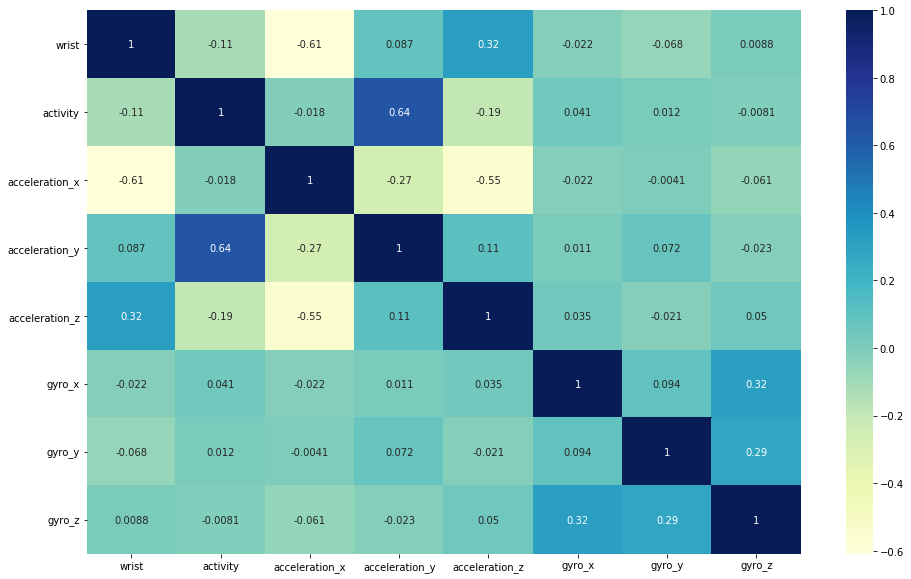

In [12]:

# now check the correlation among all variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 10))
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Observations:
### acceleration_y is highly corelated to the Activity and acceration_z is highly corelated to wrist and gyro_x with gyro_z

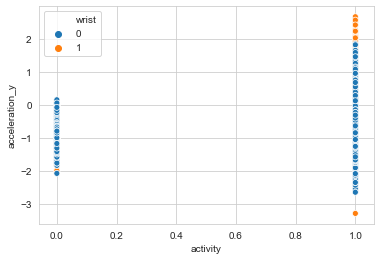

In [13]:
import seaborn as sns
sns.set_style("whitegrid")
scatteredPlot = sns.scatterplot(x="activity",y="acceleration_y",data=df1,hue="wrist")

# Observation-
### The person wearing equipment in right side wrist have highest acceleration and most of them runs 

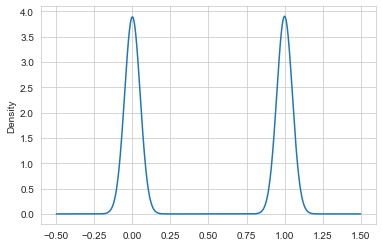

In [14]:
df1['activity'].plot.density()

# Observation-
### Walking and running persons are equally distributed , even from below calculations too it return 50% walks and 50% run.

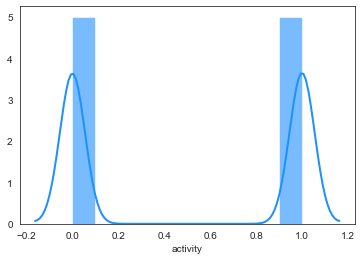

In [15]:
import seaborn as sns
sns.set_style("white")

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(df1['activity'], color="dodgerblue", label="activity", **kwargs,bins=10)

In [16]:


WalkCount= df1[df1['activity']==0].count()
RunningCoun= df1[df1['activity']==1].count()


print("walk-count ",WalkCount)
print("running-count ",WalkCount)


walk-count  wrist             44223
activity          44223
acceleration_x    44223
acceleration_y    44223
acceleration_z    44223
gyro_x            44223
gyro_y            44223
gyro_z            44223
dtype: int64
running-count  wrist             44223
activity          44223
acceleration_x    44223
acceleration_y    44223
acceleration_z    44223
gyro_x            44223
gyro_y            44223
gyro_z            44223
dtype: int64


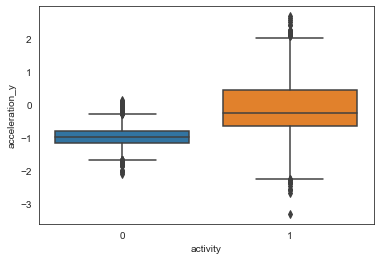

In [17]:
sns.boxplot(x="activity",y="acceleration_y",data=df1)
plt.show()

# Observation - 
## We will ignore outliers as have on 75th percentile because they may due high accelaration at running

# Classification Algo -Naive Bayes algorithm

In [18]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,Y_train)



GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
from sklearn import metrics

y_pred= model.predict(X_train)

print ('Train Accuracy:',metrics.accuracy_score(Y_train,y_pred))


Train Accuracy: 0.9569108706519811


In [26]:
Y_pred= model.predict(X_test)

NB_modelAccuracy = metrics.accuracy_score(Y_test,Y_pred)

NB_modelAccuracy


0.9571433946645596

# Calculate F score for Naive based model so that can compare for all model that which one is more accurate

In [36]:
from sklearn.metrics import f1_score
score = f1_score(Y_test, Y_pred, average='binary')
# F1_scoreNaiveModel 0.9556446902137934
F1_scoreNaiveModel ='%.3f' % score 

F1_scoreNaiveModel

'0.956'

In [37]:
#Predictions testing
final_predictions=pd.DataFrame()
final_predictions['Actual']=df1['activity']
final_predictions['Predictions']=model.predict(df1.drop(['activity'],axis=1))

final_predictions.head(5)

,Actual,Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


# Classification Algo -Logistic Regrssion algorithm¶

In [38]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred= logistic_model.predict(X_test)

print ('Accuracy:',metrics.accuracy_score(Y_test,y_pred))


Accuracy: 0.8621740602776837


In [40]:
y_pred= logistic_model.predict(X_train)

print ('Accuracy:',metrics.accuracy_score(Y_train,y_pred))


Accuracy: 0.8603473577268549


In [45]:
from sklearn.metrics import f1_score

f1_logisticRegression = f1_score(Y_test, y_pred, average='weighted')
f1_logisticRegression

0.8618504140662945

In [46]:
final_predictions=pd.DataFrame()
final_predictions['Actual']=df1['activity']
final_predictions['Predictions']=logistic_model.predict(df1.drop(['activity'],axis=1))

final_predictions.head(5)

,Actual,Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


# Classification Algo -Decision tree algorithm¶

In [47]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
y_pred= dt_model.predict(X_train)

print ('Accuracy:',metrics.accuracy_score(Y_train,y_pred))

Accuracy: 1.0


In [53]:
y_pred= dt_model.predict(X_test)

print ('Accuracy:',metrics.accuracy_score(Y_test,y_pred))

Accuracy: 0.9842721149866426


In [54]:
from sklearn.metrics import f1_score

f1_DT = f1_score(Y_test, y_pred, average='weighted')
f1_DT

0.9842721108004653

In [55]:
from sklearn.model_selection import GridSearchCV

# use a full grid over all parameters
param_grid = {"max_depth": [2,3,4],
              "max_features": [1, 3, 5],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(dt_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [56]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 5,
 'min_samples_split': 2}

In [57]:
#Import Tree Classifier model
from sklearn import tree

dt1 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4,min_samples_split=2,max_features=5) #creating decision tree object
#Train the model using the training sets
dt1.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred1 = dt1.predict(X_test)



In [58]:
y_pred= dt1.predict(X_test)

print ('Accuracy:',metrics.accuracy_score(Y_test,y_pred))

Accuracy: 0.958535575873876


## Accuracy reduced after using best params so we will not use grid search best params

In [59]:
print(dict(zip(X_train.columns, dt_model.feature_importances_)))

{'wrist': 0.008485404047055075, 'acceleration_x': 0.042386788448194115, 'acceleration_y': 0.5332768478889212, 'acceleration_z': 0.3421353281558379, 'gyro_x': 0.0215090422876934, 'gyro_y': 0.006765663474877612, 'gyro_z': 0.04544092569742064}


# Classification Algo - Random Forest 

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
y_pred_rf= rf.predict(X_test)

print ('Accuracy:',metrics.accuracy_score(Y_test,y_pred_rf))


Accuracy: 0.99153403318659


In [61]:
y_pred_rf= rf.predict(X_train)

print ('Accuracy:',metrics.accuracy_score(Y_train,y_pred_rf))

Accuracy: 1.0


In [62]:
from sklearn.metrics import f1_score

f1_rf = f1_score(Y_test, y_pred, average='weighted')
f1_rf

0.9585339950287473

In [ ]:
from sklearn.model_selection import GridSearchCV

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 5],
              "min_samples_split": [2, 3, 5],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search_rf = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search_rf.fit(X_train, Y_train)

In [ ]:
grid_search_rf.best_params_

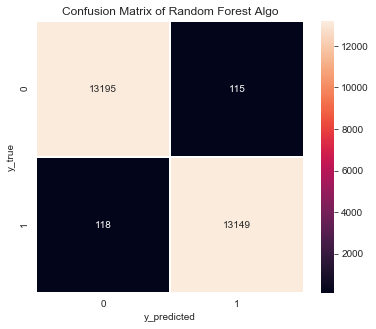

In [64]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test,rf.predict(X_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Random Forest Algo")
plt.show()

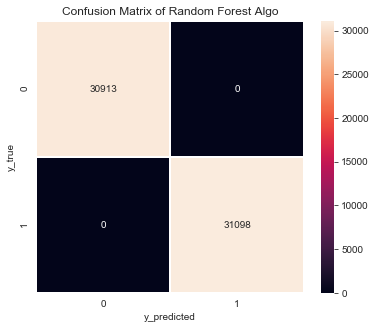

In [65]:
# training errors
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_train,rf.predict(X_train))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Random Forest Algo")
plt.show()

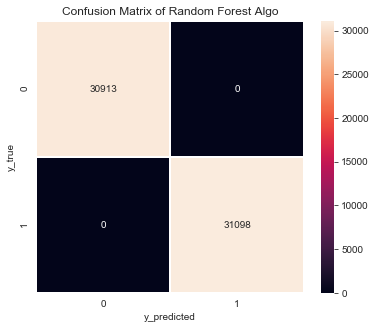

In [66]:
# training errors
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_train,dt_model.predict(X_train))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Random Forest Algo")
plt.show()

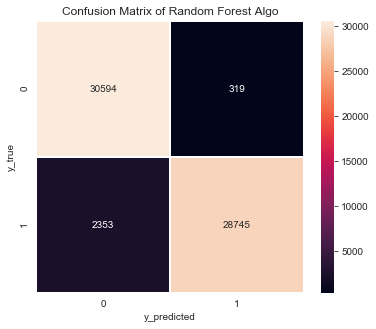

In [67]:
# training errors
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_train,model.predict(X_train))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Random Forest Algo")
plt.show()

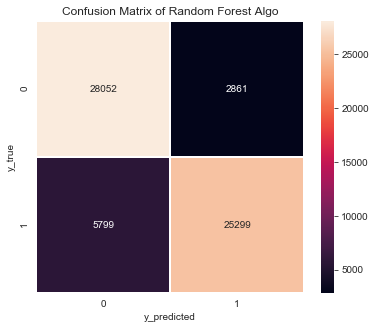

In [68]:
# training errors
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_train,logistic_model.predict(X_train))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Random Forest Algo")
plt.show()

In [71]:
dict = {'Algo Name':["Naive Bayes", "Logistic Regrssion", "Decision tree", "Random Forest "], 
        'Accuracy':[0.957, 0.862, 0.984,0.99],
        'F1-Score':[F1_scoreNaiveModel,f1_logisticRegression,f1_DT,f1_rf]} 
  
df2 = pd.DataFrame(dict) 

df2.head()

,Algo Name,Accuracy,F1-Score
0,Naive Bayes,0.957,0.956
1,Logistic Regrssion,0.862,0.86185
2,Decision tree,0.984,0.984272
3,Random Forest,0.990,0.958534


## Observation - Decision tree model has highest accuracy as it has highest F1-Score. 

# Part 2- Repeat the model once using only the acceleration values as predictors and then using only the gyro values as predictors.

In [73]:
# original dataset
df.shape

(88588, 11)

In [75]:
# drop the gyro and check the prediction based on acceleration


df1 = df.drop(['gyro_x','gyro_y','gyro_z'],axis=1)

df1.shape

(88588, 8)

In [76]:
df2 = df1.drop(['date','time','username'],axis=1)

df2.shape

(88588, 5)

In [77]:
## Before split into training and testing dataset, we will split dependent variable/ and independent variable
from sklearn.model_selection import train_test_split

X = df2.drop(['activity'],axis=1)
Y = df2["activity"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state =20)

In [78]:
print('train size ',X_train.shape)

print('test size ',X_test.shape)

train size  (62011, 4)
test size  (26577, 4)


In [79]:
# Classification Algo -Naive Bayes algorithm

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,Y_train)

from sklearn import metrics

y_pred= model.predict(X_train)

print ('Train Accuracy:',metrics.accuracy_score(Y_train,y_pred))


Train Accuracy: 0.9575397913273451


In [80]:
Y_pred= model.predict(X_test)

NB_modelAccuracy = metrics.accuracy_score(Y_test,Y_pred)

print ('Test Accuracy:' ,NB_modelAccuracy)



Test Accuracy: 0.9583098167588516


In [81]:
# Calculate F score for Naive based model so that can compare for all model that which one is more accurate

from sklearn.metrics import f1_score
score = f1_score(Y_test, Y_pred, average='binary')
# F1_scoreNaiveModel 0.9556446902137934
F1_scoreNaiveModel ='%.3f' % score 

F1_scoreNaiveModel


'0.957'

In [87]:
# Classification Algo -Logistic Regrssion algorithm¶

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(X_train,Y_train)

y_pred= logistic_model.predict(X_test)

print ('Accuracy Test:', metrics.accuracy_score(Y_test,y_pred))



Accuracy Test: 0.8599540956466117


In [89]:
y_pred_train= logistic_model.predict(X_train)

print ('Accuracy Train:',metrics.accuracy_score(Y_train,y_pred_train))


Accuracy Train: 0.8588798761510055


In [88]:
from sklearn.metrics import f1_score

f1_logisticRegression = f1_score(Y_test, y_pred, average='weighted')
f1_logisticRegression


0.8596164639580054

In [90]:
# Classification Algo -Decision tree algorithm¶

from sklearn import tree

dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

y_pred= dt_model.predict(X_train)

print ('Accuracy:',metrics.accuracy_score(Y_train,y_pred))

Accuracy: 1.0


In [91]:
y_pred= dt_model.predict(X_test)

print ('Accuracy:',metrics.accuracy_score(Y_test,y_pred))



Accuracy: 0.9595514918914851


In [92]:
from sklearn.metrics import f1_score

f1_DT = f1_score(Y_test, y_pred, average='weighted')
f1_DT



0.9595515159428853

In [93]:
from sklearn.model_selection import GridSearchCV

# use a full grid over all parameters
param_grid = {"max_depth": [2,3,4],
              "max_features": [1, 3, 5],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}



In [94]:
# run grid search
grid_search = GridSearchCV(dt_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [95]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 3,
 'min_samples_split': 2}

In [96]:
#Import Tree Classifier model
from sklearn import tree

dt1 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4,min_samples_split=2,max_features=3) #creating decision tree object
#Train the model using the training sets
dt1.fit(X_train, Y_train)

#Predict the response for test dataset


y_pred= dt1.predict(X_test)

print ('Accuracy:',metrics.accuracy_score(Y_test,y_pred))

Accuracy: 0.9612070587349965


In [99]:
# Classification Algo - Random Forest 

from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(X_train,Y_train)

y_pred_rf= rf.predict(X_test)

print ('Accuracy test:',metrics.accuracy_score(Y_test,y_pred_rf))




Accuracy test: 0.9745268465214283


In [101]:
y_pred_rf= rf.predict(X_train)



print ('Accuracy: train',metrics.accuracy_score(Y_train,y_pred_rf))


Accuracy: train 0.9999677476576736


In [102]:
from sklearn.metrics import f1_score

f1_rf = f1_score(Y_test, y_pred, average='weighted')
f1_rf



0.9611883110490177

In [103]:
dict = {'Algo Name':["Naive Bayes", "Logistic Regrssion", "Decision tree", "Random Forest "], 
        'Accuracy':[0.957, 0.862, 0.984,0.99],
        'F1-Score':[F1_scoreNaiveModel,f1_logisticRegression,f1_DT,f1_rf]} 
  
df3 = pd.DataFrame(dict) 

df3.head()

,Algo Name,Accuracy,F1-Score
0,Naive Bayes,0.957,0.957
1,Logistic Regrssion,0.862,0.859616
2,Decision tree,0.984,0.959552
3,Random Forest,0.990,0.961188


## Observation- After removing gyro feature, we found random forest has highest accuracy.

# Part 3- Repeat the model once using only the gyro values as predictors and remove the acceleration values 

In [8]:
# original dataset
df.shape



(88588, 11)

In [9]:
# drop the gyro and check the prediction based on acceleration


df1 = df.drop(['acceleration_x','acceleration_y','acceleration_z'],axis=1)

df1.shape

(88588, 8)

In [10]:
df2 = df1.drop(['date','time','username'],axis=1)

df2.shape

(88588, 5)

In [11]:
## Before split into training and testing dataset, we will split dependent variable/ and independent variable
from sklearn.model_selection import train_test_split

X = df2.drop(['activity'],axis=1)
Y = df2["activity"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state =20)

In [12]:
# Classification Algo -Naive Bayes algorithm

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,Y_train)

from sklearn import metrics

y_pred= model.predict(X_train)

print ('Train Accuracy:',metrics.accuracy_score(Y_train,y_pred))


Train Accuracy: 0.6538194836399993


In [13]:
Y_pred= model.predict(X_test)

NB_modelAccuracy = metrics.accuracy_score(Y_test,Y_pred)

print ('Test Accuracy:' ,NB_modelAccuracy)



Test Accuracy: 0.6569213982014523


In [14]:
# Calculate F score for Naive based model so that can compare for all model that which one is more accurate

from sklearn.metrics import f1_score
score = f1_score(Y_test, Y_pred, average='binary')
# F1_scoreNaiveModel 0.9556446902137934
F1_scoreNaiveModel ='%.3f' % score 

F1_scoreNaiveModel


'0.629'

In [15]:
# Classification Algo -Logistic Regrssion algorithm¶

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(X_train,Y_train)

y_pred= logistic_model.predict(X_test)

print ('Accuracy Test:', metrics.accuracy_score(Y_test,y_pred))


Accuracy Test: 0.5560070737856041


In [16]:
y_pred_train= logistic_model.predict(X_train)

print ('Accuracy Train:',metrics.accuracy_score(Y_train,y_pred_train))


Accuracy Train: 0.5539984841399107


In [17]:
from sklearn.metrics import f1_score

f1_logisticRegression = f1_score(Y_test, y_pred, average='weighted')
f1_logisticRegression


0.555939933082039

In [19]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

y_pred= dt_model.predict(X_train)

print ('Accuracy:',metrics.accuracy_score(Y_train,y_pred))

Accuracy: 1.0


In [20]:
y_pred= dt_model.predict(X_test)

print ('Test Accuracy:',metrics.accuracy_score(Y_test,y_pred))



Test Accuracy: 0.8497196824321782


In [21]:
from sklearn.metrics import f1_score

f1_DT = f1_score(Y_test, y_pred, average='weighted')
f1_DT

0.8497195696688754

In [22]:
from sklearn.model_selection import GridSearchCV

# use a full grid over all parameters
param_grid = {"max_depth": [2,3,4],
              "max_features": [1, 3, 5],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}


In [23]:
grid_search = GridSearchCV(dt_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [24]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 3,
 'min_samples_split': 3}

In [25]:
#Import Tree Classifier model
from sklearn import tree

dt1 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4,min_samples_split=3,max_features=3) #creating decision tree object
#Train the model using the training sets
dt1.fit(X_train, Y_train)

#Predict the response for test dataset


y_pred= dt1.predict(X_test)

print ('Accuracy:',metrics.accuracy_score(Y_test,y_pred))

Accuracy: 0.6781427550137337


In [26]:
# Classification Algo - Random Forest 

from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(X_train,Y_train)

y_pred_rf= rf.predict(X_test)

print ('Accuracy test:',metrics.accuracy_score(Y_test,y_pred_rf))


Accuracy test: 0.8858411408360612


In [27]:
y_pred_rf= rf.predict(X_train)
print ('Accuracy: train',metrics.accuracy_score(Y_train,y_pred_rf))


Accuracy: train 0.9999677476576736


In [28]:
from sklearn.metrics import f1_score

f1_rf = f1_score(Y_test, y_pred, average='weighted')
f1_rf

0.6524578050106006

In [29]:
dict = {'Algo Name':["Naive Bayes", "Logistic Regrssion", "Decision tree", "Random Forest "], 
        'Accuracy':[0.957, 0.862, 0.984,0.99],
        'F1-Score':[F1_scoreNaiveModel,f1_logisticRegression,f1_DT,f1_rf]} 
  
df3 = pd.DataFrame(dict) 

df3.head()

,Algo Name,Accuracy,F1-Score
0,Naive Bayes,0.957,0.629
1,Logistic Regrssion,0.862,0.55594
2,Decision tree,0.984,0.84972
3,Random Forest,0.990,0.652458


# Observation- After removing accelaration feature, we found Decision Tree has highest accuracy as it has highest F1 Score.